# Plot scan

In [69]:
import warnings
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.append('../plotting')
from auxPlots import interpolateData
from nloSbottomXsec import xsecF
import seaborn as sns
from scipy.interpolate import interp1d
pd.option_context('display.max_columns', -1)

pd.options.mode.chained_assignment = None #Disable copy warnings
# plt.style.use('fivethirtyeight') #Set style
# mpl.rcParams.update({'figure.figsize' : (15,10)})  #Set general plotting options
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})

plt.rcParams.update({"savefig.dpi" : 300}) #Figure resolution


#Define plotting style:
sns.set_style('ticks',{'font.family':'Times New Roman', 'font.serif':'Times New Roman'})
sns.set_context('paper', font_scale=1.8)
cm = plt.colormaps['RdYlBu']

### Load Recast Data

In [70]:
recastDF_all = pd.read_pickle('../results_dataFrames/pp2BB1j_2018_42_New.pcl')
recastDF_all['robs'] = 1/recastDF_all['$\mu_{obs}$']

### Get all model points

In [71]:
mLLP = 'mLLP'
mn1= 'mLSP'
tau = 'tau_ns'
models = []
mCols = [mLLP,mn1,tau,'robs']
recastDF_all.sort_values(mCols,inplace=True,ascending=True)
recastDF = recastDF_all.drop_duplicates(subset=[mLLP,mn1,tau],keep="last")
recastDF.dropna(subset=["robs"],inplace=True)
# recastDF.fillna(0.0,inplace=True)

for row in recastDF[mCols].values:
    m = dict(zip(mCols,row.tolist()))
    if m not in models:
        models.append(m)
print('%i models loaded' %len(models))

172 models loaded


### Get K-factors

In [72]:
recastDF['kfactor'] = recastDF[mLLP].apply(xsecF)/recastDF['Total xsec (pb)']
print('%1.1f < k-factor < %1.1f' %(recastDF['kfactor'].min(),recastDF['kfactor'].max()))

1.4 < k-factor < 3.8


### Plot exclusion for each analysis

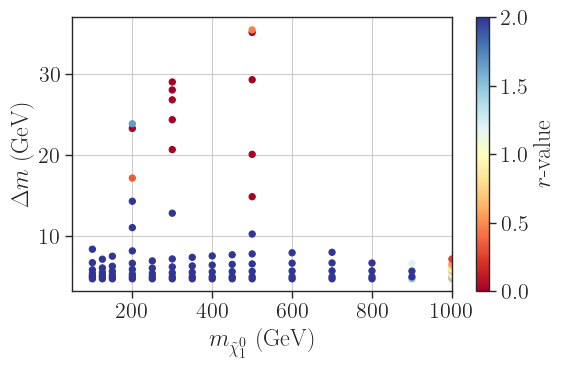

In [73]:
fig = plt.figure(figsize=(6,4))
x = recastDF['mLSP']
y = recastDF['mLLP']-x
rValues = recastDF['robs']*recastDF['kfactor']
p = plt.scatter(x=x,y=y,vmin=0.0,vmax=2.0,
        c=rValues,cmap=cm,s=20)
plt.colorbar(label=r'$r$-value')
# Interpolate to create more points
xnew,ynew,znew = interpolateData(x,y,rValues,nx=500,ny=500)
cValues = sorted([1.])
# Get contours
# plt.contour(xnew, ynew, znew, cValues, 
                        #    colors='black',linestyles='dashed',
                        #    linewidths=2.0)

plt.ylabel(r'$\Delta m$ (GeV)')
plt.xlabel(r'$m_{\tilde \chi_1^0}$ (GeV)')
# plt.yscale('log')
plt.xlim(50.,1000.)
# plt.ylim(0.,25.)
# ax.set_ylim(5.0,1.1*y.max())
plt.grid()

# fig.subplots_adjust(right=0.9,top=1.1)
# cbar_ax = fig.add_axes([0.99, 0.25, 0.01, 0.5]) 
# plt.legend()
plt.tight_layout()
plt.show()

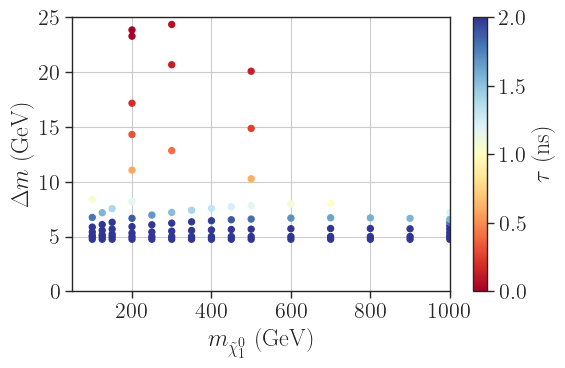

In [76]:
fig = plt.figure(figsize=(6,4))
x = recastDF['mLSP']
y = recastDF['mLLP']-x
rValues = recastDF['tau_ns']
p = plt.scatter(x=x,y=y,vmin=0.0,vmax=2.0,
        c=rValues,cmap=cm,s=20)
plt.colorbar(label=r'$\tau$ (ns)')
# Interpolate to create more points
# xnew,ynew,znew = interpolateData(x,y,rValues,nx=500,ny=500)
# cValues = sorted([1.])
# Get contours
# plt.contour(xnew, ynew, znew, cValues, 
                        #    colors='black',linestyles='dashed',
                        #    linewidths=2.0)

plt.ylabel(r'$\Delta m$ (GeV)')
plt.xlabel(r'$m_{\tilde \chi_1^0}$ (GeV)')
# plt.yscale('log')
# plt.xlim(0.2,50.)
plt.ylim(0.,25.)
plt.xlim(50.,1000.)
# ax.set_ylim(5.0,1.1*y.max())
plt.grid()

# fig.subplots_adjust(right=0.9,top=1.1)
# cbar_ax = fig.add_axes([0.99, 0.25, 0.01, 0.5]) 
# plt.legend()
plt.tight_layout()
plt.show()

In [77]:
recastDF_all[recastDF_all['mLSP'] == 200.0]

,mLLP,mLSP,tau_ns,Luminosity (1/fb),Regime,SR,Target Mass [GeV],$N_s$,$\sigma_{Ns}$,width,...,error +,error -,Observed,p0-value,Local Z signif.,S95_exp,S95_obs,$\mu_{obs}$,$\mu_{exp}$,robs
76,204.75,200.0,7.150000,139.0,Long Lifetime,SR-Inclusive_High,200.0,1987.155935,473.973648,9.205594e-17,...,2.6,-1.8,7.0,0.261,0.6,6.1,7.8,0.003925,0.003070,254.763581
64,204.75,200.0,7.150000,139.0,Long Lifetime,SR-Inclusive_Low,200.0,4068.771082,576.876287,9.205594e-17,...,7.0,-4.0,54.0,0.500,0.0,18.0,13.0,0.003195,0.004424,312.982391
65,205.00,200.0,4.389999,139.0,Long Lifetime,SR-Inclusive_Low,200.0,4573.939711,605.784706,1.499317e-16,...,7.0,-4.0,54.0,0.500,0.0,18.0,13.0,0.002842,0.003935,351.841516
77,205.00,200.0,4.389999,139.0,Long Lifetime,SR-Inclusive_High,200.0,2818.655249,624.709176,1.499317e-16,...,2.6,-1.8,7.0,0.261,0.6,6.1,7.8,0.002767,0.002164,361.366058
66,205.32,200.0,3.440000,139.0,Long Lifetime,SR-Inclusive_Low,200.0,3487.581977,493.770964,1.913372e-16,...,7.0,-4.0,54.0,0.500,0.0,18.0,13.0,0.003728,0.005161,268.275537
78,205.32,200.0,3.440000,139.0,Long Lifetime,SR-Inclusive_High,200.0,3096.207663,756.768794,1.913372e-16,...,2.6,-1.8,7.0,0.261,0.6,6.1,7.8,0.002519,0.001970,396.949700
67,205.90,200.0,2.560000,139.0,Long Lifetime,SR-Inclusive_Low,200.0,6244.697044,665.418521,2.571094e-16,...,7.0,-4.0,54.0,0.500,0.0,18.0,13.0,0.002082,0.002882,480.361311
79,205.90,200.0,2.560000,139.0,Long Lifetime,SR-Inclusive_High,200.0,3858.988592,730.663594,2.571094e-16,...,2.6,-1.8,7.0,0.261,0.6,6.1,7.8,0.002021,0.001581,494.742127
80,206.66,200.0,1.880000,139.0,Long Lifetime,SR-Inclusive_High,200.0,2917.425419,598.531031,3.501064e-16,...,2.6,-1.8,7.0,0.261,0.6,6.1,7.8,0.002674,0.002091,374.028900
68,206.66,200.0,1.880000,139.0,Long Lifetime,SR-Inclusive_Low,200.0,5262.220740,627.808729,3.501064e-16,...,7.0,-4.0,54.0,0.500,0.0,18.0,13.0,0.002470,0.003421,404.786211
